In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

Xtrain = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
Xtest = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
ytrain, ytest = y[:124], y[124:]

In [2]:
from sklearn.metrics import accuracy_score

class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
        self.train_loss_history = []
        self.val_accuracy_history = []

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            
            if (output.shape == (1,1)):
                output = output[0]
                
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)
        acc = 0

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                output = output.reshape(1, output.shape[0])
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            # append error to plot it later
            self.train_loss_history.append(err)
            # do prediction, cal
            pred = self.predict(x_train)
            acc = self.accuracy(y_train, pred)
            self.val_accuracy_history.append(acc)
            print('epoch %d/%d   error=%f    accuracy=%f' % (i+1, epochs, err, acc))
            
    def accuracy(self, ytrain, pred):
        acc = accuracy_score(ytrain, np.round(pred))
        return acc

In [3]:
import numpy as np

from layers import LayerDense,ActivationLayer
from activations import tanh, sigmoid
from losses import mse, mse_prime

# network
net = Network()
net.add(LayerDense(17, 5))
net.add(ActivationLayer(sigmoid))
net.add(LayerDense(5, 1))
net.add(ActivationLayer(tanh))
# train
net.use(mse, mse_prime)
net.fit(Xtrain, ytrain, epochs=600, learning_rate=0.01)

# test
out = net.predict(Xtrain)

epoch 1/600   error=0.246242    accuracy=0.500000
epoch 2/600   error=0.253306    accuracy=0.500000
epoch 3/600   error=0.250530    accuracy=0.500000
epoch 4/600   error=0.247624    accuracy=0.500000
epoch 5/600   error=0.244945    accuracy=0.500000
epoch 6/600   error=0.242434    accuracy=0.500000
epoch 7/600   error=0.240030    accuracy=0.500000
epoch 8/600   error=0.237678    accuracy=0.500000
epoch 9/600   error=0.235337    accuracy=0.500000
epoch 10/600   error=0.232971    accuracy=0.500000
epoch 11/600   error=0.230553    accuracy=0.508065
epoch 12/600   error=0.228061    accuracy=0.532258
epoch 13/600   error=0.225478    accuracy=0.524194
epoch 14/600   error=0.222793    accuracy=0.524194
epoch 15/600   error=0.220001    accuracy=0.524194
epoch 16/600   error=0.217101    accuracy=0.524194
epoch 17/600   error=0.214098    accuracy=0.524194
epoch 18/600   error=0.211003    accuracy=0.556452
epoch 19/600   error=0.207828    accuracy=0.564516
epoch 20/600   error=0.204595    accurac

epoch 166/600   error=0.099078    accuracy=0.862903
epoch 167/600   error=0.098390    accuracy=0.862903
epoch 168/600   error=0.097701    accuracy=0.862903
epoch 169/600   error=0.097011    accuracy=0.862903
epoch 170/600   error=0.096321    accuracy=0.862903
epoch 171/600   error=0.095630    accuracy=0.862903
epoch 172/600   error=0.094939    accuracy=0.862903
epoch 173/600   error=0.094247    accuracy=0.862903
epoch 174/600   error=0.093555    accuracy=0.862903
epoch 175/600   error=0.092863    accuracy=0.862903
epoch 176/600   error=0.092172    accuracy=0.862903
epoch 177/600   error=0.091480    accuracy=0.862903
epoch 178/600   error=0.090788    accuracy=0.862903
epoch 179/600   error=0.090097    accuracy=0.862903
epoch 180/600   error=0.089406    accuracy=0.862903
epoch 181/600   error=0.088716    accuracy=0.862903
epoch 182/600   error=0.088027    accuracy=0.862903
epoch 183/600   error=0.087339    accuracy=0.862903
epoch 184/600   error=0.086651    accuracy=0.862903
epoch 185/60

epoch 343/600   error=0.011580    accuracy=1.000000
epoch 344/600   error=0.011387    accuracy=1.000000
epoch 345/600   error=0.011198    accuracy=1.000000
epoch 346/600   error=0.011014    accuracy=1.000000
epoch 347/600   error=0.010834    accuracy=1.000000
epoch 348/600   error=0.010657    accuracy=1.000000
epoch 349/600   error=0.010485    accuracy=1.000000
epoch 350/600   error=0.010316    accuracy=1.000000
epoch 351/600   error=0.010151    accuracy=1.000000
epoch 352/600   error=0.009989    accuracy=1.000000
epoch 353/600   error=0.009831    accuracy=1.000000
epoch 354/600   error=0.009677    accuracy=1.000000
epoch 355/600   error=0.009526    accuracy=1.000000
epoch 356/600   error=0.009378    accuracy=1.000000
epoch 357/600   error=0.009234    accuracy=1.000000
epoch 358/600   error=0.009093    accuracy=1.000000
epoch 359/600   error=0.008954    accuracy=1.000000
epoch 360/600   error=0.008819    accuracy=1.000000
epoch 361/600   error=0.008687    accuracy=1.000000
epoch 362/60

epoch 501/600   error=0.002280    accuracy=1.000000
epoch 502/600   error=0.002266    accuracy=1.000000
epoch 503/600   error=0.002252    accuracy=1.000000
epoch 504/600   error=0.002239    accuracy=1.000000
epoch 505/600   error=0.002225    accuracy=1.000000
epoch 506/600   error=0.002212    accuracy=1.000000
epoch 507/600   error=0.002199    accuracy=1.000000
epoch 508/600   error=0.002186    accuracy=1.000000
epoch 509/600   error=0.002173    accuracy=1.000000
epoch 510/600   error=0.002161    accuracy=1.000000
epoch 511/600   error=0.002148    accuracy=1.000000
epoch 512/600   error=0.002136    accuracy=1.000000
epoch 513/600   error=0.002124    accuracy=1.000000
epoch 514/600   error=0.002111    accuracy=1.000000
epoch 515/600   error=0.002099    accuracy=1.000000
epoch 516/600   error=0.002088    accuracy=1.000000
epoch 517/600   error=0.002076    accuracy=1.000000
epoch 518/600   error=0.002064    accuracy=1.000000
epoch 519/600   error=0.002053    accuracy=1.000000
epoch 520/60

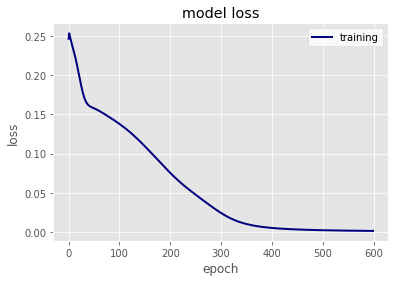

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.train_loss_history, color='navy', lw=2)
loss.set_title('model loss')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

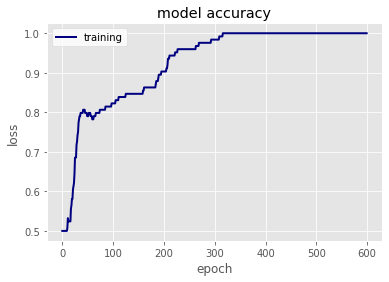

In [5]:
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.val_accuracy_history, color='navy', lw=2)
loss.set_title('model accuracy')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()